In [1]:
# 1.0 Initialize


# 1.1 Import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# 1.2 Read data set
data = pd.read_csv('../datasets/US-Heart-Disease-Mortality.csv')
df = pd.DataFrame(data)

In [2]:
# 2.0 Data Information

In [3]:
# 2.1 Top 5 rows of the table
df.head()

,Year,State,Topic,Mortality,Gender,Race
0,2017,AK,Heart Disease Mortality,172.9,Overall,Overall
1,2017,AK,Heart Disease Mortality,172.2,Overall,Overall
2,2017,AK,Heart Disease Mortality,243.3,Overall,Overall
3,2017,AK,Heart Disease Mortality,337.1,Overall,Overall
4,2017,AK,Heart Disease Mortality,NaN,Overall,Overall


In [4]:
# 2.2 Bottom 5 rows of the table
df.tail()

,Year,State,Topic,Mortality,Gender,Race
59089,2017,WY,Heart Disease Mortality,NaN,Male,Black
59090,2017,WY,Heart Disease Mortality,NaN,Female,Asian and Pacific Islander
59091,2017,WY,Heart Disease Mortality,313.1,Overall,American Indian and Alaskan Native
59092,2017,WY,Heart Disease Mortality,NaN,Male,Asian and Pacific Islander
59093,2017,WY,Heart Disease Mortality,291.3,Female,American Indian and Alaskan Native


In [5]:
# 2.3 Table information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       59094 non-null  int64  
 1   State      59094 non-null  object 
 2   Topic      59094 non-null  object 
 3   Mortality  32550 non-null  float64
 4   Gender     59094 non-null  object 
 5   Race       59094 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ MB


In [6]:
# 3.0 Data Cleaning Process

In [7]:
# 3.1 Verfify that all the table contents are unique 
df.nunique()

Year            1
State          57
Topic           1
Mortality    6229
Gender          3
Race            6
dtype: int64

In [8]:
# 3.2 Race unique values
df['Race'].unique()

array(['Overall', 'Black', 'American Indian and Alaskan Native', 'White',
       'Hispanic', 'Asian and Pacific Islander'], dtype=object)

In [9]:
# 3.3 Gender unique values
df['Gender'].unique()

array(['Overall', 'Male', 'Female'], dtype=object)

In [10]:
# 3.4 Drop Year Column
df.drop(columns=['Year'], inplace=True)

In [11]:
# 3.5 Drop year Topic
df.drop(columns=['Topic'], inplace=True)

In [12]:
# 3.6 Remove duplicates
df.drop_duplicates(keep=False,inplace=True)

In [13]:
# 3.7 Merge Mortality for duplicate columns
df = df.groupby(['State','Gender', 'Race'],as_index=False).agg({'Mortality': 'sum'})


In [14]:
# 3.8 Top 5 rows after cleaning
df.head()

,State,Gender,Race,Mortality
0,AK,Female,American Indian and Alaskan Native,4911.2
1,AK,Female,Asian and Pacific Islander,473.6
2,AK,Female,Black,923.7
3,AK,Female,Hispanic,304.2
4,AK,Female,Overall,5043.5


In [15]:
# 4.0 Table Statisctics
df.describe()

,Mortality
count,880.000000
mean,12161.997727
std,15881.692869
min,56.700000
25%,1677.200000
50%,5076.250000
75%,17678.400000
max,116297.500000


In [ ]:
# 5.0 Visualizing data

Text(0.5, 1.0, 'Mortality per race')

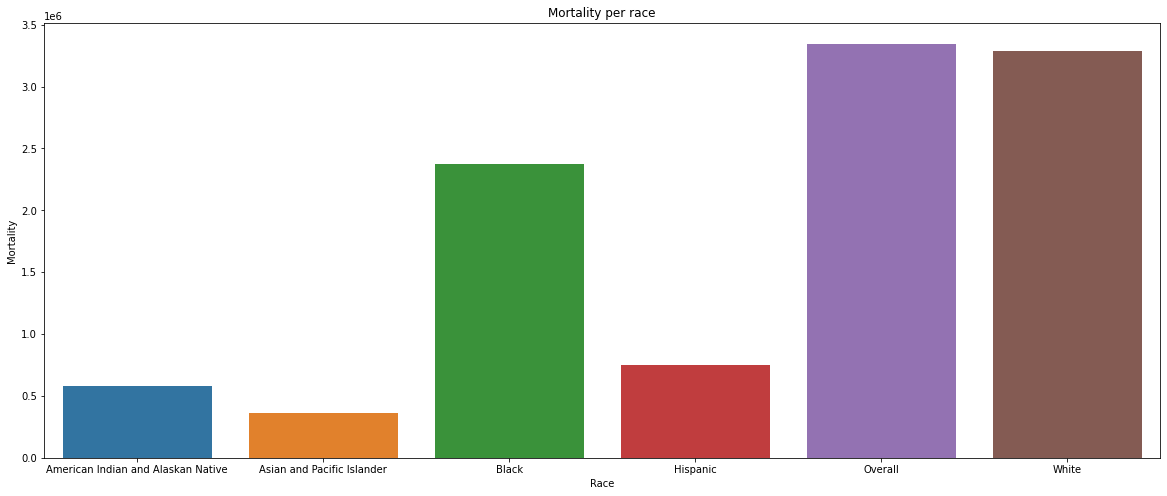

In [27]:
# 5.1 Mortality per race

# Sum up mortality per race
race = df.groupby(['Race'],as_index=False).agg({'Mortality': 'sum'})

plt.figure(figsize=(20,8)) 
sns.barplot(x="Race", y="Mortality", data=race)
plt.title("Mortality per race")

Text(0.5, 1.0, 'Mortality per state')

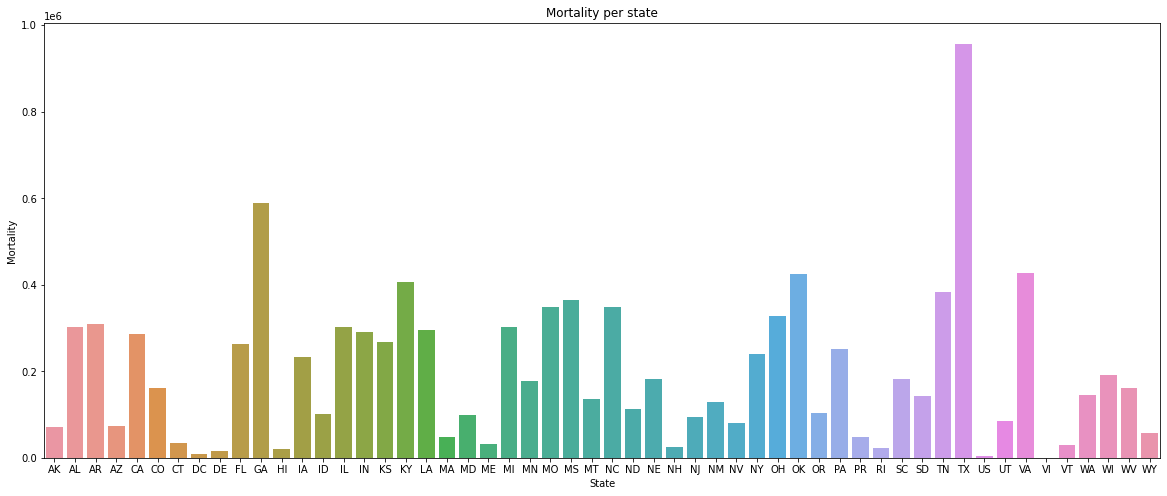

In [28]:
# 5.2 Mortality per state

# Sum up mortality per race
state = df.groupby(['State'],as_index=False).agg({'Mortality': 'sum'})

plt.figure(figsize=(20,8)) 
sns.barplot(x="State", y="Mortality", data=state)
plt.title("Mortality per state")

Text(0.5, 1.0, 'Mortality per Gender')

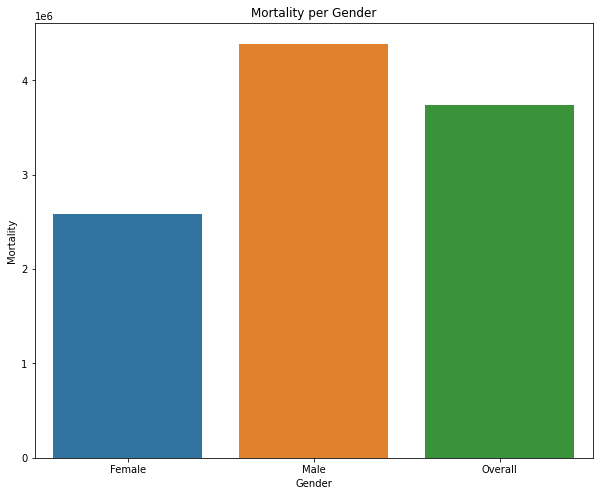

In [31]:
# 5.3 Mortality per gender

# Sum up mortality per race
gender = df.groupby(['Gender'],as_index=False).agg({'Mortality': 'sum'})

plt.figure(figsize=(10,8)) 
sns.barplot(x="Gender", y="Mortality", data=gender)
plt.title("Mortality per Gender")

In [29]:
# 6.0 Generate report
# profile = ProfileReport(df, title='US Heart Disease Mortality Report', explorative=True)
# profile.to_file("../reports/USheartDiseaseMortalityReport.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 501.29it/s]
